# Intro to Generalized Stability Theory


#### Navid C. Constantinou
#### RSES, ANU, 2018

### Linear Systems

Consider the linear system that describes perturbations about a basic state,

\begin{align}
\frac{\mathrm{d} \boldsymbol{\phi}}{\mathrm{d}t}  = \mathbb{A}\,\boldsymbol{\phi},\quad \boldsymbol{\phi}(t_0)=\boldsymbol{\phi}_0. \tag{1}
\end{align}

Above, $\boldsymbol{\phi}$ is the state vector that collectively describes the perturbations about the basic state and  $\mathbb{A}$ is a linear operator (which implicitly depends on the basic state).

We are interested on how the energy of the perturbations is going to evolves with time.

Energy is a quadratic quantity usually defined through an inner product. Let's begin for simplicity with the case in which the perturbation energy is given through an inner product

\begin{align}
E(t) = \big(\boldsymbol{\phi}(t), \boldsymbol{\phi}(t)\big). \tag{2}
\end{align}

For example, for a finite-dimensional state space, e.g., $\mathbb{C}^{n\times 1}$, the inner product can be simply the Euclidean inner product 

\begin{align}
(\boldsymbol{\psi}, \boldsymbol{\phi}) \equiv \boldsymbol{\psi}^\dagger \boldsymbol{\phi} = \sum_{j=1}^n \psi_j^* \phi_j. \tag{3}
\end{align}



The linear system (1) has solution:

\begin{align}
\boldsymbol{\phi}(t) = \mathbb{P}(t,t_0)\,\boldsymbol{\phi}_0 , \tag{4}
\end{align}

where $\mathbb{P}(t,t_0)$ is a *linear* operator that maps the state at time $t_0$ to the state at time $t$. Linear map $\Phi$ is called the *propagator*. 

When the linear operator in (1) is time-independent then the propagator is nothing else than

\begin{align}
\mathbb{P}(t,t_0) = \exp{(\mathbb{A}(t-t_0))} , \tag{5}
\end{align}

defined as

\begin{align}
\exp{\big(\mathbb{A}(t-t_0)\big)} = \sum_{n=0}^{\infty} \frac{\mathbb{A}^n(t-t_0)^n}{n!} . \tag{6}
\end{align}


**Exercise**: Verify that expression (4) with $\mathbb{P}$ given by (5) solves (1).

**Exercise**: Verify that (6) satifies property (4). (Just convince yourself that the first few terms in the power series, e.g., up to the term $\mathcal{O}(\mathbb{A}^2)$, *do* follow this property.)


From hereafter let's take $t_0=0$ for simplicity.


**Definition 1**: The adjoint operator of $\mathbb{A}$ is denoted as $\mathbb{A}^\dagger$ and is defined through:

\begin{align}
(\boldsymbol{\psi}, \mathbb{A}\boldsymbol{\phi}) = (\mathbb{A}^\dagger\boldsymbol{\psi}, \boldsymbol{\phi})\ \ \mathit{for}\ \mathit{every}\ \boldsymbol{\phi},\boldsymbol{\psi} \text{ in the vector space}. \tag{8}
\end{align}

Note that the adjoint operator depends on the inner product!

**Definition 2 (Adjoint operator)**: An operator $\mathbb{A}$ is called *self-adjoint* or *Hermitian* if and only if $\mathbb{A}=\mathbb{A}^\dagger$.

**Definition 3 (Self-adjoint operator)**: An operator $\mathbb{A}$ is called *normal* if and only if $\mathbb{A}\mathbb{A}^\dagger = \mathbb{A}^\dagger \mathbb{A}$.

**Corrolary**: Self-adjoint operators are necessarily normal.

**Theorem I**: Self-adjoint operators have real eigenvalues.

*Proof*: If $\lambda$ is an eigenvalue of $\mathbb{A}$ and $\boldsymbol{u}$ the corresponding eigenvector, $\mathbb{A}\,\boldsymbol{u} = \lambda\,\boldsymbol{u}$. By forming:

\begin{align*}
(\boldsymbol{u}, \mathbb{A}\boldsymbol{u}) = (\boldsymbol{u}, \lambda \boldsymbol{u}) = \lambda (\boldsymbol{u}, \boldsymbol{u}).
\end{align*}

On the other hand, using that $\mathbb{A} = \mathbb{A}^\dagger$ we have

\begin{align*}
(\boldsymbol{u}, \mathbb{A}\boldsymbol{u}) = (\mathbb{A}^\dagger \boldsymbol{u}, \boldsymbol{u}) = (\mathbb{A} \boldsymbol{u}, \boldsymbol{u}) = (\lambda \boldsymbol{u}, \boldsymbol{u}) =\lambda^* (\boldsymbol{u}, \boldsymbol{u}).
\end{align*}

From these we get that $(\lambda-\lambda^*)(\boldsymbol{u}, \boldsymbol{u})=0$ and since $|\boldsymbol{u}|>0$ we get that $\lambda=\lambda^*$.


**Theorem II**: Normal operators have orthonormal eigenvectors.

The proof of this is a bit cumbersome. We will prove it here for self-adjoint operators, which are only a subset of normal operators.

*Proof*: Consider a non-degenerate operators. Assume $\boldsymbol{u}_1$ and $\boldsymbol{u}_2$ are two eigenvectors of $\mathbb{A}$ that correspond to eigenvalues $\lambda_1,\lambda_2$ ($\lambda_1\ne \lambda_2$). Then we have

\begin{align*}
\big(\boldsymbol{u}_1,\mathbb{A}\boldsymbol{u}_2\big) = \lambda_2 \big(\boldsymbol{u}_1,\boldsymbol{u}_2\big).
\end{align*}

But also we have

\begin{align*}
\big(\boldsymbol{u}_1,\mathbb{A}\boldsymbol{u}_2\big) = \big(\mathbb{A}^\dagger\boldsymbol{u}_1,\boldsymbol{u}_2\big)= \big(\mathbb{A}\boldsymbol{u}_1,\boldsymbol{u}_2\big) = \lambda_1 \big(\boldsymbol{u}_1,\boldsymbol{u}_2\big).
\end{align*}

Combining the two we have $(\lambda_1-\lambda_2) \big(\boldsymbol{u}_1,\boldsymbol{u}_2\big) = 0$ from which it follows that $\big(\boldsymbol{u}_1,\boldsymbol{u}_2\big) = 0$.

The following code snippet demonstrates the properties of self-adjoint operators.

In [1]:
using LinearAlgebra, Printf, PyPlot
Base.show(io::IO, f::Float64) = @printf(io, "%1.2f", f)

In [2]:
function analyze_operator(A)
    S, U = eigen(A);
    println("A="); show(stdout, "text/plain", A);
    println(" "); println(" ")
    println("norm(A-A') = ", norm(A-A'), ", eigvalues of A: ", S);
    println(" ");
end

A = [-3/2 -1/2; -1/2 -3/2]; analyze_operator(A)
A = [-1 1; 0 1]; analyze_operator(A)
A = rand(2, 2) + im*rand(2,2); A = (A+A')/2; # this is to convert the random A to a self-adjoint one
analyze_operator(A)

A=
2×2 Array{Float64,2}:
 -1.50  -0.50
 -0.50  -1.50 
 
norm(A-A') = 0.00, eigvalues of A: [-2.00, -1.00]
 
A=
2×2 Array{Int64,2}:
 -1  1
  0  1 
 
norm(A-A') = 1.41, eigvalues of A: [-1.00, 1.00]
 
A=
2×2 Array{Complex{Float64},2}:
 0.40+0.00im  0.62-0.31im
 0.62+0.31im  0.13+0.00im 
 
norm(A-A') = 0.00, eigvalues of A: [-0.44, 0.97]
 


**Theorem III (Properties of the adjoint)**: The adjoint operator $\mathbb{A}^\dagger$ has *(i)* eigenvalues which are complex conjugates of the eigenvalues of $\mathbb{A}$. Furthermore, *(ii)* the eigenvectors of $\mathbb{A}$ and $\mathbb{A}^\dagger$ that *do not* correspond to a complex conjugate eigenvalue pair are orthogonal to each other.

*Proof*:

*(i)* The eigenvalues $\lambda$ of $\mathbb{A}$ solve the characteristic polynomial $\mathrm{det}(\mathbb{A}-\lambda\mathbb{I})=0$. Using that $\mathrm{det}{(\mathbb{A}^\dagger)} = \mathrm{det}{(\mathbb{A})}^*$ we can show that

\begin{align}
0 = \mathrm{det}(\mathbb{A}-\lambda\mathbb{I})^*=\mathrm{det}\big[(\mathbb{A}-\lambda\mathbb{I})^\dagger\big]=\mathrm{det}(\mathbb{A}^\dagger-\lambda^*\mathbb{I}),
\end{align}

which implies that the eigenvalues of $\mathbb{A}^\dagger$ are $\lambda^*$, i.e., the complex conjugates of the eigenvalues of $\mathbb{A}$.

*(ii)* Consider now the eigenvector/eigenvalue relations for $\mathbb{A}$ and $\mathbb{A}^\dagger$:

\begin{align*}
\mathbb{A}\,\boldsymbol{u}_j = \lambda_j\,\boldsymbol{u}_j\quad\text{and}\quad 
\mathbb{A}^\dagger\boldsymbol{\upsilon}_j = \lambda_j^*\,\boldsymbol{\upsilon}_j. \tag{10a,b}
\end{align*}


Take for simplicity that there is no degeneracy. By taking the inner product of (10a) with the eigenvector $\boldsymbol{\upsilon}_i$ we have

\begin{align*}
(\boldsymbol{\upsilon}_i, \mathbb{A}\boldsymbol{u}_j) &= (\boldsymbol{\upsilon}_i, \lambda_j\boldsymbol{u}_j) = \lambda_j\,(\boldsymbol{\upsilon}_i,\boldsymbol{u}_j).
\end{align*}

But on the other hand, using the definition of $\mathbb{A}^\dagger$, 

\begin{align*}
(\boldsymbol{\upsilon}_i, \mathbb{A}\boldsymbol{u}_j) &= (\mathbb{A}^\dagger\boldsymbol{\upsilon}_i, \boldsymbol{u}_j) = (\lambda_i^*\boldsymbol{\upsilon}_i, \boldsymbol{u}_j) = \lambda_i\,(\boldsymbol{\upsilon}_i,\boldsymbol{u}_j).
\end{align*}

These imply that

\begin{align*}
(\lambda_i-\lambda_j)\,(\boldsymbol{\upsilon}_i,\boldsymbol{u}_j) = 0,
\end{align*}

and since there is no degeneracy (i.e., $\lambda_i\ne\lambda_j$) it follows that

\begin{align*}
(\boldsymbol{\upsilon}_i,\boldsymbol{u}_j) = 0\text{ for }i\ne j.\tag{11}
\end{align*}




The following code snippet demonstrates the properties of the adjoint operators.

In [3]:
A = rand(2, 2) + im*rand(2,2); 

S, U = eigen(A); u1 = U[:, 1]; u2 =U[:, 2]
Sadj, V = eigen(copy(A')); v1 = V[:, 1]; v2 =V[:, 2]

println("A="); show(stdout, "text/plain", A);
println(" "); println(" ")
println("eigvalues of A: λ1=", S[1], " , λ2=", S[2]); println(" "); 

println("A'="); show(stdout, "text/plain", A');
println(" "); println(" ")
println("eigvalues of A': μ1=", Sadj[1], " , μ2=", Sadj[2]); println(" ");

println("inner products between eigenvectors of A and of A'");
println("(u1, v1) = ", dot(u1, v1), ", (u1, v2) = ", dot(u1, v2))
println("(u2, v1) = ", dot(u2, v1), ", (u2, v2) = ", dot(u2, v2))

A=
2×2 Array{Complex{Float64},2}:
 0.24+0.27im  0.57+0.20im
 1.00+0.90im  0.54+0.55im 
 
eigvalues of A: λ1=-0.39 - 0.07im , λ2=1.18 + 0.89im
 
A'=
2×2 Adjoint{Complex{Float64},Array{Complex{Float64},2}}:
 0.24-0.27im  1.00-0.90im
 0.57-0.20im  0.54-0.55im 
 
eigvalues of A': μ1=-0.39 + 0.07im , μ2=1.18 - 0.89im
 
inner products between eigenvectors of A and of A'
(u1, v1) = -0.91 - 0.17im, (u1, v2) = -0.00 - 0.00im
(u2, v1) = -0.00 + 0.00im, (u2, v2) = 0.91 + 0.17im


**Definition 4 (Rayleigh's quotient)**: For any self-adjoint operator $\mathbb{M}$ the quantity:

\begin{align}
R(\mathbb{M}, \boldsymbol{\phi}) = \frac{(\boldsymbol{\phi}, \mathbb{M} \boldsymbol{\phi})}{(\boldsymbol{\phi}, \boldsymbol{\phi})}, \tag{9}
\end{align}

is called *Rayleigh's quotient*.

**Properties of Rayleigh's quotient**:

Rayleigh's quotient is a function that maps vectors $\boldsymbol{\phi}$ to scalars. It satisfies the following properties:

1. $R(\mathbb{M}, \boldsymbol{\phi})$ is real for *any* $\boldsymbol{\phi}$ in the vector space.
2. $R(\mathbb{M}, c\boldsymbol{\phi}) = R(\boldsymbol{\phi})$.
3. $\lambda_{\min}\le R(\mathbb{M}, \boldsymbol{\phi})\le \lambda_{\max}$, where is $\lambda_{\min},\lambda_{\max}$ are the minimum and maximum eigenvalues of $\mathbb{M}$.
4. The stationary values of $R$ are the eigenvalues of $\mathbb{M}$ and they are obtained when $\boldsymbol{\phi}$ is the corresponding eigenvector of $\mathbb{M}$.

**Exercise**: Show property 1 of Rayleigh's quotient.

**Exercise** (bit harder): Show property 4 of Rayleigh's quotient. That is, assume that $R(\mathbb{M}, \boldsymbol{\phi})$ is a stationary point and show that $\boldsymbol{\phi}$ is necessarily an eigenvector of $\mathbb{M}$. 

Hint: To do so, write consider the Rayleigh's quotient evaluated at the slightly perturbed state $R(\mathbb{M}, \boldsymbol{\phi}+\delta\boldsymbol{\phi})$ with $\|\delta\boldsymbol{\phi}\|\ll\|\boldsymbol{\phi}\|$. Since $R(\mathbb{M}, \boldsymbol{\phi})$ is a stationary point then it must be that

\begin{align*}
R(\mathbb{M}, \boldsymbol{\phi}+\delta\boldsymbol{\phi}) - R(\mathbb{M}, \boldsymbol{\phi}) = \mathcal{O}\big[(\delta\boldsymbol{\phi})^2\big].
\end{align*}

From properties 3 and 4 it is evident that the maximum (or minimum) value of Rayleigh's quotient $R$ is obtained for the  eigenvector of $\mathbb{M}$ that corresponds to $\lambda_{\max}$ (or $\lambda_{\min}$).

Now we have all tools available to attack the question of maximum energy growth for linear system (1).

### Energy growth

The energy growth for linear system (1) is $E(t)\big/E(0)$. Using solution (4)-(5) we get

\begin{align*}
\frac{E(t)}{E(0)} &= \frac{\big(e^{\mathbb{A}t}\boldsymbol{u}_0\,,\,e^{\mathbb{A}t}\boldsymbol{u}_0\big)}{\big(\boldsymbol{u}_0\,,\,\boldsymbol{u}_0\big)}\\
&= \frac{\big(\boldsymbol{u}_0\,,\,(e^{\mathbb{A}t})^\dagger e^{\mathbb{A}t}\boldsymbol{u}_0\big)}{\big(\boldsymbol{u}_0\,,\,\boldsymbol{u}_0\big)}\\
&= \frac{\big(\boldsymbol{u}_0\,,\,e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}\boldsymbol{u}_0\big)}{\big(\boldsymbol{u}_0\,,\,\boldsymbol{u}_0\big)}.\tag{12}
\end{align*}

But that's nothing else than the Rayleigh quotient of operator $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$!

**Exercise**: Show that operator $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$ is self-adjoint and, furthermore, that its eigenvalues are positive.




**Theorem IV (Bounds on perturbation energy growth)**

The energy growth $E(t)\big/E(0)$ of linear system (1) is bounded from above by the maximum eigenvalue of $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$. The inital state $\boldsymbol{u}_0$ that produces maximum energy growth at time $t$ is the eigenvector of $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$ that corresponds to its maximum eigenvalue.

Similarly, $E(t)\big/E(0)$ is bounded from below by the minimum eigenvalue of $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$ with the corresponding eigenvector being the initial condition that produces this minimum energy growth.

*Proof*: This follows after the remark that $E(t)\big/E(0) = R\big(e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}\,,\, \boldsymbol{u}_0\big)$ and then employing the properties of the Rayleigh quotient.

**Corrolary 1**

For $t\ll1$, all eigenvectors of $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$ coincide with the eigenvectors of $\mathbb{A^\dagger} + \mathbb{A}$.

**Corrolary 2**

For $t \to \infty$, the eigenvector of $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$ that corresponds to the largest eigenvalue coincides with the eigenvector of $\mathbb{A^\dagger}$ that corresponds to the eigenvalue with maximum real part.


The theorem on bounds on perturbation energy growth is general and holds for both normal and non-normal operators.

For normal operators we have that operators: $\mathbb{A}$, $\mathbb{A}$, $(\mathbb{A}+\mathbb{A}^\dagger)$, and $e^{\mathbb{A}^\dagger t}e^{\mathbb{A}t}$ *all* commute with each other and thus share the same eigenvectors. Therefore one needs not need to distinguish between them; only computing the eigenvectors of $\mathbb{A}$ is enough to give you everything you need. Thus, for normal operators the notion of perturbation growth is *equivalent* with the notion of modal instability. However, this is not the case at all for non-normal operators. The theorem above generalizes the notion of modal instability to take into account non-normality and transient energy growth effects. It lies in the heart of the, so called, Generalized Stability Theory.

Before proving Collolaries 1 & 2 let's see all these in action.


**Example**

Let's take the non-normal operator

\begin{align*}
\mathbb{A} = \begin{pmatrix} -1 & 5 \\ 0 & -2\end{pmatrix}
\end{align*}

and compute $E(t)/E(0)$ with the following initial conditions:

1. eigenvector of $\mathbb{A}$ that has eigenvalue with maximum real part,
2. eigenvector of $\mathbb{A}^\dagger$ that has eigenvalue with maximum real part, $\mathbb{A}^\dagger$,
3. eigenvector of $\mathbb{A}+\mathbb{A}^\dagger$ that has the maximum eigenvalue, and 
4. eigenvector of $e^{\mathbb{A}^\dagger t_*}e^{\mathbb{A} t_*}$ that has the maximum eigenvalue for some finite value of $t_*$.

In [4]:
# A function that integrates (1) and computes E(t)

function integrateforward(x0; tfinal=1)
    t = range(0, stop=tfinal, length=200)
    energy = zeros(length(t))
    upperbound = zeros(length(t))
    dt = t[2]-t[1]
    xt = x0
    P = Matrix(I, 2, 2);
    expAdt = exp(A*dt)
    for j=1:length(t)
        energy[j] = dot(xt, xt)
        upperbound[j] = maximum(eigvals(copy(P')*P))
        P = expAdt*P
        xt = expAdt*xt
    end
    return t, energy, upperbound
end;

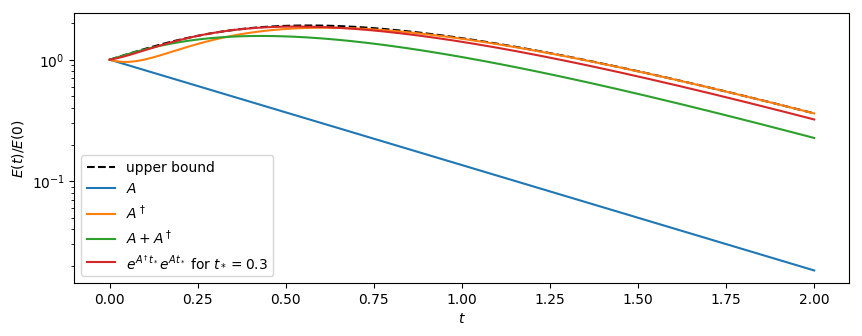

In [5]:
A = [-1 5; 0 -2]; 
S, U = eigen(A); u1 = U[:, 1]; u2 =U[:, 2]
Sadj, V = eigen(copy(A')); v1 = V[:, 2]; v2 =V[:, 1]; #to make sure v1 <--> u1
Sinst, Uinst = eigen(A + copy(A')); u01 = Uinst[:, 1]; u02 =Uinst[:, 2];
topt = 0.3; Sopt, Uopt = eigen(exp(A'*topt)*exp(A*topt)); w1 = Uopt[:, 1]; w2 =Uopt[:, 2];
tfinal = 2
figure(figsize=(10, 3.5))
t, energy, upperbound = integrateforward(u1; tfinal=tfinal)
semilogy(t, upperbound, "--k", label="upper bound")
semilogy(t, energy, label="\$ A\$")
t, energy = integrateforward(v2; tfinal=tfinal)
semilogy(t, energy, label="\$A^\\dagger\$")
t, energy = integrateforward(u02; tfinal=tfinal)
semilogy(t, energy, label="\$A +A^\\dagger\$")
t, energy = integrateforward(w2; tfinal=tfinal)
semilogy(t, energy, label="\$e^{A^\\dagger t_*}e^{A t_*}\$ for \$t_*=0.3\$")
xlabel(L"t"); ylabel(L"E(t)/E(0)"); legend();

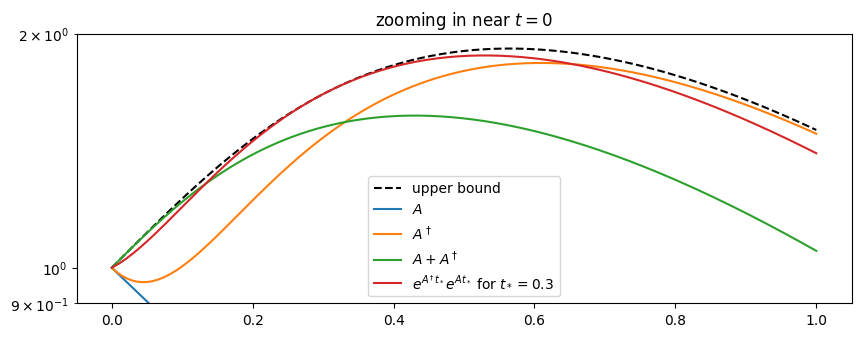

In [6]:
tfinal = 1
figure(figsize=(10, 3.5))
t, energy, upperbound = integrateforward(u1; tfinal=tfinal)
semilogy(t, upperbound, "--k", label="upper bound")
semilogy(t, energy, label="\$ A\$")
t, energy = integrateforward(v2; tfinal=tfinal)
semilogy(t, energy, label="\$A^\\dagger\$")
t, energy = integrateforward(u02; tfinal=tfinal)
semilogy(t, energy, label="\$A +A^\\dagger\$")
t, energy = integrateforward(w2; tfinal=tfinal)
semilogy(t, energy, label="\$e^{A^\\dagger t_*}e^{A t_*}\$ for \$t_*=0.3\$")
title("zooming in near \$t=0\$")
ylim(0.9, 2); legend();

**Proof of Corrolary 1**

This is so because
\begin{align*}
\frac{E(t)}{E(0)} &= \frac{\big(\boldsymbol{u}_0\,,\,e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}\boldsymbol{u}_0\big)}{\big(\boldsymbol{u}_0\,,\,\boldsymbol{u}_0\big)}\\
&\approx \frac{\big(\boldsymbol{u}_0\,,[\mathbb{I} + \mathbb{A^\dagger}t + \mathcal{O}(t^2)][\mathbb{I} + \mathbb{A}t + \mathcal{O}(t^2)]\boldsymbol{u}_0\big)}{\big(\boldsymbol{u}_0\,,\,\boldsymbol{u}_0\big)}\\
&= 1 + t\frac{\big(\boldsymbol{u}_0\,,(\mathbb{A^\dagger}+\mathbb{A})\boldsymbol{u}_0\big)}{\big(\boldsymbol{u}_0\,,\,\boldsymbol{u}_0\big)} + \mathcal{O}(t^2),\tag{13}
\end{align*}
which is nothing else than the Rayleigh quotient of $\mathbb{A^\dagger}+\mathbb{A}$.


**Proof of Corrolary 2**

This is a bit harder to see. We will show it here for the case of finite-dimensional operators.

First let's make a remark that about the eigenvectors of the adjoint $\mathbb{A}^\dagger$. If $\mathbb{U}$ is the matrix whose columns are the eigenvectors $\boldsymbol{u}_j$ of $\mathbb{A}$ then we can get the matrix $\widetilde{\mathbb{V}}$ of the (non-unit-normalized) eigenvectors of the adjoint $\mathbb{A}^\dagger$ as:

\begin{align*}
\mathbb{\widetilde{V}} = (\mathbb{U}^{-1})^\dagger.\tag{14}
\end{align*}

(The tilde is just to remind us that each of the column of $\widetilde{\mathbb{V}}$ is *not* normalized to have unit norm.)

To understand why (14) is true, remember the orthogonality property between eigenvectors of $\mathbb{A}$ and eigenvectors of $\mathbb{A}^\dagger$ that correspond to non-complex-conjugate eigenvalues. Thus:

\begin{align*}
\underbrace{\begin{pmatrix} \begin{bmatrix} & \boldsymbol{\upsilon}_1^* & \end{bmatrix} \\ \vdots \\ \begin{bmatrix} & \boldsymbol{\upsilon}_n^* & \end{bmatrix}\end{pmatrix}}_{=\mathbb{V}^{\dagger}}\,\underbrace{\begin{pmatrix} \begin{bmatrix} \\ \boldsymbol{u}_1 \\ \\ \end{bmatrix} & \dotsb & \begin{bmatrix} \\ \boldsymbol{u}_n \\\\ \end{bmatrix}\end{pmatrix}}_{=\mathbb{U}} = \underbrace{\begin{pmatrix} \alpha_1 & 0 & 0\\0 & \ddots &0 \\ 0 & 0 & \alpha_n\end{pmatrix}}_{=\mathbb{D}\text{ diagonal matrix}}
\end{align*}

with $\alpha_j \equiv (\boldsymbol{\upsilon}_j,\boldsymbol{u}_j)$ the inner product between the eigenvectors of $\mathbb{A}$ and the eigenvectors of $\mathbb{A}^\dagger$ with conjugate eigenvalue. From (..) it follows that

\begin{align*}
\mathbb{I} &= \underbrace{\begin{pmatrix} \frac1{\alpha_1^*}\begin{bmatrix} & \boldsymbol{\upsilon}_1^* & \end{bmatrix} \\ \vdots \\ \frac1{\alpha_n^*}\begin{bmatrix} & \boldsymbol{\upsilon}_n^* & \end{bmatrix}\end{pmatrix}}_{=\left(\mathbb{V}\mathbb{D}^{-1}\right)^{\dagger}}\,\underbrace{\begin{pmatrix} \begin{bmatrix} \\ \boldsymbol{u}_1 \\ \\ \end{bmatrix} & \dotsb & \begin{bmatrix} \\ \boldsymbol{u}_n \\\\ \end{bmatrix}\end{pmatrix}}_{=\mathbb{U}}
\end{align*}

From the above we conclude that

\begin{align*}
\mathbb{V}= (\mathbb{U}^{-1})^\dagger \mathbb{D} \tag{15}
\end{align*}



In [7]:
A = rand(2, 2) + im*rand(2,2); 

S, U = eigen(A); u1 = U[:, 1]; u2 =U[:, 2]
Sadj, V = eigen(copy(A')); v1 = V[:, 1]; v2 =V[:, 2]

D = Diagonal([dot(u1, v1), dot(u2, v2)])

println("       V = ", V)
println("U^(-1)*D = ", inv(U)'*D)


       V = Complex{Float64}[0.92+0.00im -0.66-0.14im; 0.34-0.18im 0.74+0.00im]
U^(-1)*D = Complex{Float64}[0.92-0.00im -0.66-0.14im; 0.34-0.18im 0.74+0.00im]


But the diagonal matrix $\mathbb{D}$ is only a scale factor for each column of $\mathbb{V}$. If we are not necessarily interested in unit-normed eigenvectors of $\mathbb{A}^\dagger$ then we just have (14).

Having established (14) or (15) we can proceed to show that for $t\to\infty$ the eigenvector of $e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}$ with maximum eigenvalue tends to the eigenvector of $\mathbb{A}^\dagger$ corresponding to the eigenvalue with maximum real part.

Consider the eigenanalysis of $e^{\mathbb{A}t}$: 

\begin{align*}
e^{\mathbb{A}t} &= \mathbb{U} \, \underbrace{\begin{pmatrix} e^{\delta_1 t} & 0 & 0\\0 & \ddots &0 \\ 0 & 0 & e^{\delta_n t}\end{pmatrix}}_{=\mathbb{\Delta}}\, \mathbb{U}^{-1}. \tag{16}
\end{align*}

**Exercise**: It's easy to show that $\mathbb{A}$ and $e^{\mathbb{A}t}$ commute and thus share the same eigenvectors. That is why in (16) the eigenvectors of $\mathbb{A}$ appear. 




In eigenanalysis (16) the eigenvalues are ordered with descending real part, i.e., $\mathrm{Re}(e^{\delta_1 t})\ge\dotsb\ge\mathrm{Re}(e^{\delta_n t})$. Also, $\mathbb{U}^{-1}=\widetilde{\mathbb{V}}^{\dagger}$ (from (14)). We can rewrite then (16) as

\begin{align*}
e^{\mathbb{A}t} = \underbrace{\begin{pmatrix} \begin{bmatrix} \\ \boldsymbol{u}_1 \\ \\ \end{bmatrix} & \dotsb & \begin{bmatrix} \\ \boldsymbol{u}_n \\\\ \end{bmatrix}\end{pmatrix}}_{=\mathbb{U}}\, \underbrace{\begin{pmatrix} e^{\delta_1 t} & 0 & 0\\0 & \ddots &0 \\ 0 & 0 & e^{\delta_n t}\end{pmatrix}}_{=\mathbb{\Delta}}\,\underbrace{\begin{pmatrix} \frac1{\alpha_1^*}\begin{bmatrix} & \boldsymbol{\upsilon}_1^* & \end{bmatrix} \\ \vdots \\ \frac1{\alpha_n^*}\begin{bmatrix} & \boldsymbol{\upsilon}_n^* & \end{bmatrix}\end{pmatrix}}_{=\widetilde{\mathbb{V}}^{\dagger}}.\tag{17}
\end{align*}

The eigenvalues are ordered with descending real part, i.e., $\mathrm{Re}(e^{\delta_1 t})\ge\dotsb\ge\mathrm{Re}(e^{\delta_n t})$. Thus, for $t\to\infty$ the leading eigenvalue dominates and thus we have that 

\begin{align*}
e^{\mathbb{A}t} \sim \frac{e^{\delta_1 t} }{\alpha_1^*}\underbrace{\begin{bmatrix} \\ \boldsymbol{u}_1 \\ \\ \end{bmatrix}  \begin{bmatrix} & \boldsymbol{\upsilon}_1^* & \end{bmatrix}}_{\text{this is a matrix}}.\tag{18}
\end{align*}



Similarly,

\begin{align*}
e^{\mathbb{A}^\dagger t} &= (\mathbb{U}^{-1})^\dagger \,\begin{pmatrix} e^{\delta_1^* t} & 0 & 0\\0 & \ddots &0 \\ 0 & 0 & e^{\delta_n^* t}\end{pmatrix}\,\mathbb{U}^\dagger\\
&= \widetilde{\mathbb{V}}\,\begin{pmatrix} e^{\delta_1^* t} & 0 & 0\\0 & \ddots &0 \\ 0 & 0 & e^{\delta_n^* t}\end{pmatrix}\,\mathbb{V}^{-1}.\tag{19}
\end{align*}

and for $t\to \infty$

\begin{align*}
e^{\mathbb{A}^\dagger t} \sim \frac{e^{\delta_1^* t}}{\alpha_1} \begin{bmatrix} \\ \boldsymbol{\upsilon}_1 \\ \\ \end{bmatrix}  \begin{bmatrix} & \boldsymbol{u}_1^* & \end{bmatrix}. \tag{20}
\end{align*}



Using (18) and (20) we have that

\begin{align*}
\frac{E(t)}{E(0)} &= \frac{\big(\boldsymbol{\phi}_0\,,\,e^{\mathbb{A^\dagger}t} e^{\mathbb{A}t}\boldsymbol{\phi}_0\big)}{\big(\boldsymbol{\phi}_0\,,\,\boldsymbol{\phi}_0\big)}\\
&\approx \frac{e^{2\mathrm{Re}(\delta_1)t}}{\left|\alpha_1\right|^2}\frac{\big(\boldsymbol{\phi}_0\,,\,\boldsymbol{\upsilon}_1\,\boldsymbol{u}_1^\dagger \boldsymbol{u}_1 \boldsymbol{\upsilon}_1^\dagger\boldsymbol{u}_0\big)}{\big(\boldsymbol{\phi}_0\,,\,\boldsymbol{\phi}_0\big)}\\
&= \frac{e^{2\mathrm{Re}(\delta_1)t}}{\left|\alpha_1\right|^2}\frac{\big(\boldsymbol{\phi}_0\,,\,\boldsymbol{\upsilon}_1\,\boldsymbol{\upsilon}_1^\dagger\,\boldsymbol{u}_0\big)}{\big(\boldsymbol{\phi}_0\,,\,\boldsymbol{\phi}_0\big)}\quad\text{since }(\boldsymbol{u},\boldsymbol{u})=\boldsymbol{u}^\dagger \boldsymbol{u}=1\\
&= \frac{e^{2\mathrm{Re}(\delta_1)t}}{\left|\alpha_1\right|^2}\frac{\big(\boldsymbol{\upsilon}_1^\dagger\boldsymbol{u}_0\,,\,\boldsymbol{\upsilon}_1^\dagger\,\boldsymbol{u}_0\big)}{\big(\boldsymbol{\phi}_0\,,\,\boldsymbol{\phi}_0\big)}\\
&= \frac{e^{2\mathrm{Re}(\delta_1)t}}{\left|\alpha_1\right|^2}\frac{\big|\big(\boldsymbol{\upsilon}_1,\boldsymbol{\phi}_0\big)\big|^2}{\big(\boldsymbol{\phi}_0\,,\,\boldsymbol{\phi}_0\big)}, \tag{21}
\end{align*}

which is obviously maximized when $\boldsymbol{\phi}_0$ is parallel with $\boldsymbol{\upsilon}_1$. In that case


\begin{align*}
\frac{E(t)}{E(0)} &\sim \frac{e^{2\mathrm{Re}(\delta_1)t}}{\left|(\boldsymbol{\upsilon}_1,\boldsymbol{u}_1)\right|^2}. \tag{22}
\end{align*}





To understand what this means, consider equation (22) reduces to for the $2\times2$ example. In that case we have

\begin{align*}
\frac{E(t)}{E(0)} &\sim \frac{e^{2\mathrm{Re}(\delta_1)t}}{\sin^2\theta}. \tag{23}
\end{align*}

where $\theta$ is the angle between the two eigenvectors of $\mathbb{A}$.

Note that from (22) (or (23)) it is apparent that not only have we computed that the best initial condition for maximizing energy growth at $t\to\infty$ is the eigenvector $\boldsymbol{\upsilon}_1$ of the adjoint $\mathbb{A}^\dagger$, but we have also computed the growth that this initial condition would produce. We can see that the energy growth is larger by a factor of $1\big/\sin^2\theta$ if we start of with $\boldsymbol{\upsilon}_1$ rather than just starting off with the eigenvector $\boldsymbol{u}_1$of operator $\mathbb{A}$ itself.

Let's go back to our example and see how well (23) is.


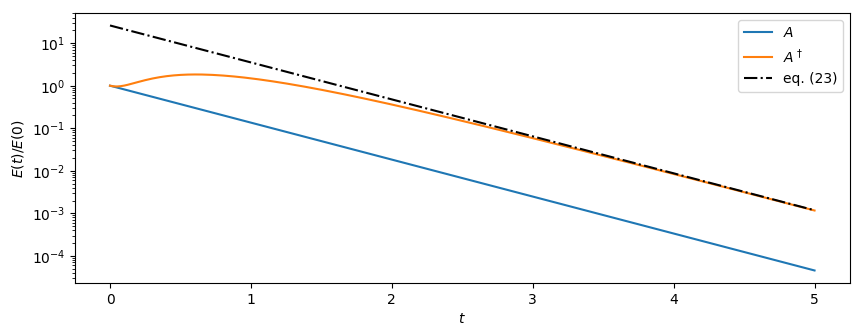

In [9]:
A = [-1 5; 0 -2]; 
S, U = eigen(A); u1 = U[:, 1]; u2 =U[:, 2]
Sadj, V = eigen(copy(A')); v1 = V[:, 2]; v2 =V[:, 1]; #to make sure v1 <--> u1
tfinal = 5
figure(figsize=(10, 3.5))
t, energy = integrateforward(u1; tfinal=tfinal)
semilogy(t, energy, label="\$ A\$")
t, energy = integrateforward(v1; tfinal=tfinal)
semilogy(t, energy, label="\$A^\\dagger\$")
semilogy(t, exp.(-2*t)/abs2(dot(u1, v1)), "-.k", label="eq. (23)")
xlabel(L"t"); ylabel(L"E(t)/E(0)"); legend();

### Inner-product structure

All the previous arguments were based on the fact that energy was given by the Euclidean inner product (2). In fact, in principle that's often note the case. Instead, the energy is given as:

\begin{align*}
E(t) = \big(\boldsymbol{\phi}\,,\,\mathbb{M}\boldsymbol{\phi}\big),\tag{24}
\end{align*}

where $\mathbb{M}$ is a self-adjoint, positive-definite operatore. (An operator is positive-definite if and only if it's self-adjoint with positive eigenvalues.) The requirements on $\mathbb{M}$ are to make sure that $E(t)>0$ and that it is only zero when $\boldsymbol{\phi}=0$.

How do we find bounds on $E(t)/E(0)$ and also the initial conditions that give, e.g., maximum energy growth when $E(t)$ is given by (24)? Do we have to proceed through the whole analysis from scratch?  (No we don't!)

It turns out that we can define a new variable $\boldsymbol{\psi}$ through:

\begin{align*}
\boldsymbol{\psi} = \mathbb{M}^{1/2}\boldsymbol{\phi}.\tag{25}
\end{align*}

(The square root of a positive-definite operator can be always defined.)

In the new variable the energy is 

\begin{align*}
E(t) &= \big(\boldsymbol{\phi}\,,\,\mathbb{M}\boldsymbol{\phi}\big)\\
&= \big((\mathbb{M}^{-1/2}\boldsymbol{\psi})\,,\,\mathbb{M}\,(\mathbb{M}^{-1/2}\boldsymbol{\psi})\big)\\
&= \big(\boldsymbol{\psi}\,,\,(\mathbb{M}^{-1/2})^{\dagger}\mathbb{M}\,\mathbb{M}^{-1/2}\boldsymbol{\psi}\big),\tag{24}
\end{align*}

But $(\mathbb{M}^{-1/2})^\dagger = (\mathbb{M}^\dagger)^{-1/2} = \mathbb{M}^{-1/2}$ and thus

\begin{align*}
E(t) &= \big(\boldsymbol{\psi}\,,\,\boldsymbol{\psi}\big).\tag{25}
\end{align*}

**Exercise**: Show that $(\mathbb{M}^{-1/2})^\dagger = (\mathbb{M}^\dagger)^{-1/2}$.

In variable $\boldsymbol{\psi}$ the energy has the form of (2). Now all we have to do is to write the linear system (1) for the new variable $\boldsymbol{\psi}$. Multiplyint (1) from the left with $\mathbb{M}^{1/2}$ we get:

\begin{align*}
\mathbb{M}^{1/2}\frac{\mathrm{d} \boldsymbol{\phi}}{\mathrm{d}t} &= \mathbb{M}^{1/2}\mathbb{A}\underbrace{\mathbb{M}^{-1/2}\mathbb{M}^{1/2}}_{=\mathbb{I}}\;\boldsymbol{\phi},\tag{26}
\end{align*}

which implies that 

\begin{align*}
\frac{\mathrm{d} \boldsymbol{\psi}}{\mathrm{d}t} &= \mathbb{M}^{1/2}\mathbb{A}\mathbb{M}^{-1/2} \,\boldsymbol{\psi},\quad \boldsymbol{\psi}(t_0)=\boldsymbol{\psi}_0. \tag{27}
\end{align*}

Therefore all we need to do is to do everything but with the only change $\mathbb{A} \to \mathbb{M}^{1/2}\mathbb{A}\mathbb{M}^{-1/2}$. 

### References

Farrell, B. F. and P. J. Ioannou (1996) "Generalized stability theory. Part I: Autonomous operators." *J. Atmos. Sci.*, **53 (14)**, 2025-2040.